# **Lab 7: Optimization and learning**
**Kevin Arnmark**

# **Abstract**

In this report I will implement the gradient descent method which is used for finding a critical point in an objective function $f(x)$. I also test the accuracy and convergence of the algorithm.

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [104]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2021 Kevin Arnmark (karnmark@kth.se)

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.



'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell.

In [105]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

In this lab I implement the following functions:

1. **Function:** Gradient descent method in Rn 

  **Input**: objective function $f(x)$ 

  **Output**: stationary point $x^*$ such that $|| grad(f)(x^*) || < TOL$

  **Test**: verify accuracy and convergence with respect to exact solution  

The gradient descent method is an iterative search method that finds a critical point of an objective function $f(x)$, by searching for the next iterate in the direction opposite the gradient of the objective function. 


# **Method**

**Gradien descent method in Rn**

This algorithm is based on Algorithm 15.1 in chapter 15.3.

I am using the central difference theorem to get the gradient of the function evaluated in x:

$\nabla f(x) \approx \frac{f(x+h) - f(x-h)}{2h}$

I choose the steplength $\alpha$ by trying to satisfy the condition:

$f(x^{(k)} - a^{(k)}\nabla f(x^{(k)}))\leq \beta f(x^{(k)})$

I implement this in an iterative method where the function iterates to satisfy the above condition by starting with $\alpha = 1$ and lowering it each iteration by a factor of $0.9$ until the condition is met or alpha is very small. I choose $\beta = 10^{-2}$ to reduce the amount of gradient_descent iterations needed. $\beta$, the decreasing factor and the minimum value of alpha could all be tweaked to get a more or less efficient algorithm.  

In [106]:
def gradient_descent(f, x0, tol=1e-7):
  x = x0
  df = get_gradient(f, x)
  while np.linalg.norm(df) > tol:
    df = get_gradient(f, x)
    alpha = get_step_length(f, df, x)
    x = x - alpha*df
  return x

def get_step_length(f, df, x):
  beta = 1e-2
  tol = f(x)*beta
  alpha = 1
  f_value = f(x - alpha*df)
  while f_value > tol and alpha > 1e-3:
    alpha *= .9
    f_value = f(x - alpha*df)
  return alpha

def get_gradient(f, x0):
  if isinstance(x0, np.ndarray):
    n = x0.size
  else:
    x0 = np.array([x0])
    n = 1
  x = np.zeros(n)
  h = 1e-5
  for i in range(n):
    x_p = x0.copy()
    x_p[i] += h
    x_m = x0.copy()
    x_m[i] -= h
    x[i] = (f(x_p) - f(x_m)) / (2*h)
  return x

# **Results**

I test this function by checking its accuracy and measuring the convergence with respect to the exact solution. I created a couple of convex functions and calculated their critical points by hand to test with. Then I use the testing functionalities of numpy to compare the critical points.

In [110]:
def fnc1(x): # Critical point is x=(-1, 2)
  return (x[0]+1)**2 + (x[1]-2)**2

def fnc2(x): # Critical point is x=2
  return (x-2)**2

def fnc3(x): # Critical point is x=(-3, 2, -1)
  return (x[0] + 3)**2 + (x[1]-2)**2 + (x[2] + 1)**2

np.testing.assert_almost_equal(gradient_descent(fnc1, np.array([-2, 4])), np.array([-1, 2]))
np.testing.assert_almost_equal(gradient_descent(fnc2, 1), 2)
np.testing.assert_almost_equal(gradient_descent(fnc3, np.array([-2, 3, -2])), np.array([-3, 2, -1]))

print("All tests are OK")

All tests are OK


To illustrate the convergence I changed the algorithm to return each point in the iteration as an array, and then plot the gradient evaluated in these points to show how they converge towards zero.


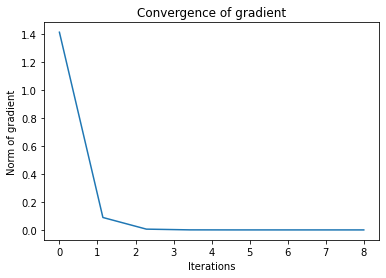

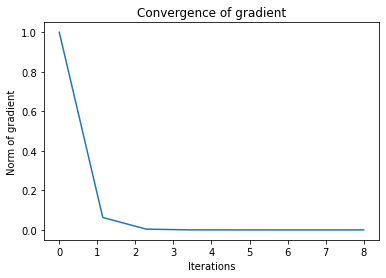

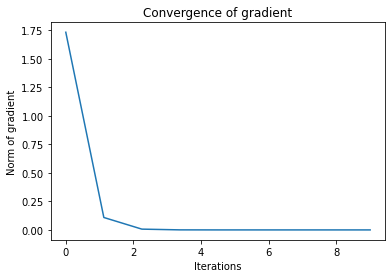

In [108]:
def gradient_descent_fplot(f, x0, tol=1e-7):
  x = []
  x.append(x0)
  df = get_gradient(f, x[0])
  k = 0
  while np.linalg.norm(df) > tol:
    df = get_gradient(f, x[k])
    alpha = get_step_length(f, df, x[k])
    x.append(x[k] - alpha*df)
    k += 1
  return x

def convergence(f, x0):
  sol = gradient_descent_fplot(f, x0)
  df = np.zeros(len(sol))
  for i in range(len(sol)):
    df[i] = np.linalg.norm(get_gradient(f, sol[i]))
  x = np.linspace(0, len(sol), len(sol))
  fig = plt.figure(1)
  ax = fig.add_subplot()
  ax.plot(x, df)
  plt.title("Convergence of gradient")
  plt.xlabel("Iterations")
  plt.ylabel("Norm of gradient")
  plt.show()

convergence(fnc1, np.array([-1.5, 2.5]))
convergence(fnc2, 2.5)
convergence(fnc3, np.array([-2.5, 1.5, -0.5]))

Here I tried to illustrate the convergence by plotting the vectors for each iteration on the function. But it converges to fast for the graphs to illustrate this well.

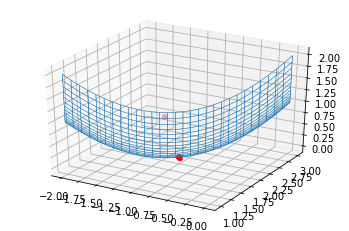

In [109]:
n = 30
x = np.linspace(-2, 0, n)
y = np.linspace(1, 3, n)
z = np.zeros((n,n))
for i in range(n):
  for j in range(n):
    z[i, j] = fnc1(np.array([x[i], y[j]]))

sol = gradient_descent_fplot(fnc1, np.array([-1.5, 2.5]))
x1 = np.zeros(len(sol))
y1 = np.zeros(len(sol))
z1 = np.zeros(len(sol))
for i in range(len(sol)):
  x1[i] = sol[i][0]
  y1[i] = sol[i][1]
  z1[i] = fnc1(sol[i])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, linewidth=0.5, alpha=0.7)
ax.scatter(x1, y1, z1, zdir='z', color='red')
plt.show()

# **Discussion**

The tests conclude that the algorithm converges towards the critical point if the inital guess is close enough. There are several different ways one could calculate the step length of the algorithm and I believe that is where this algorithm could be improved to be more effective. Each iteration of the algorithm with my implemented step length algorithm can make alot of extra iterations. If I use a fixed step length value instead, there are more iterations in the gradient descent algorithm, but it could be more efficient anyways since there are no computations needed for getting the time step.